# COGS 118B Final Project - FIFA

## Team Name: Hong Shao Rou

- Sue Xia
- Yu Pan
- Weichong Ling
- Huiran Song
- Danrui Wang

## Library Import

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


## Data Clean

In [2]:
#Read the data
df = pd.read_csv('players_20.csv')

In [3]:
#rough data overview
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
#summary statistics
print(df.shape)
df.describe()

(18278, 104)


,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [5]:
#drop the columns with no value
df_any = df.dropna(axis='columns')
df_any.shape

(18278, 56)

I made 2 dataframes: 
- df_any dropped all columns with missing values
- <s>df_10 dropped the columns have more than 10% missing values.</s>

<s>I suggest to use df_any, but you could use df_10 if you want.</s>

In [6]:
# Check columns
df_any.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_sta

## Preprocessing

Explore what cleaning does to the raw data:

In [7]:
# cols in df but not in df_any
for i in range(df.shape[1]):
    if df.columns[i] not in df_any.columns:
        print(df.columns[i])

release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb


Examine the dropped columns not in df_any:

In [8]:
df_any_dropped = df.drop(df_any.columns,axis=1)
df_any_dropped.columns

Index(['release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [9]:
# See percentage of missing values
for i in df_any_dropped.columns:
    print(i+":")
    print(df_any_dropped[i].isna().sum()/len(df_any_dropped))

release_clause_eur:
0.07101433417222891
player_tags:
0.9179888390414707
team_position:
0.01313053944632892
team_jersey_number:
0.01313053944632892
loaned_from:
0.9426633110843637
joined:
0.0704672283619652
contract_valid_until:
0.01313053944632892
nation_position:
0.9383958857643068
nation_jersey_number:
0.9383958857643068
pace:
0.11139074296969034
shooting:
0.11139074296969034
passing:
0.11139074296969034
dribbling:
0.11139074296969034
defending:
0.11139074296969034
physic:
0.11139074296969034
gk_diving:
0.8886092570303097
gk_handling:
0.8886092570303097
gk_kicking:
0.8886092570303097
gk_reflexes:
0.8886092570303097
gk_speed:
0.8886092570303097
gk_positioning:
0.8886092570303097
player_traits:
0.5860597439544808
ls:
0.11139074296969034
st:
0.11139074296969034
rs:
0.11139074296969034
lw:
0.11139074296969034
lf:
0.11139074296969034
cf:
0.11139074296969034
rf:
0.11139074296969034
rw:
0.11139074296969034
lam:
0.11139074296969034
cam:
0.11139074296969034
ram:
0.11139074296969034
lm:
0.1113

A lot of semantically significant columns have <12% NAs. Since the original dataframe have over 18,000 datapoints, we are adding the columns with low percentage of NAs back and dropping the rows missing those features. 

In [10]:
for i in df_any_dropped.columns:
    if (df_any_dropped[i].isna().sum()/len(df_any_dropped)) > 0.12:
        df_any_dropped.drop(i,axis=1,inplace=True)
        
df_cleaned = pd.concat([df_any,df_any_dropped],axis=1).dropna()
# df_cleaned.columns


Now there are multiple semantically similar columns in the dataframe such as sofifa_id, short_name and long_name. 

In [11]:
pd.set_option('display.max_columns', None)  
# df_cleaned.head()

In [12]:
df_cleaned.drop(['player_url', 'short_name', 'long_name'],axis=1, inplace=True)
df_cleaned.shape

(15077, 90)

Examine the object columns in df_cleaned:

In [13]:
df_cleaned.select_dtypes('object')

,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,team_position,joined,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,1987-06-24,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,Yes,RW,2004-07-01,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,LW,2018-07-10,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,1992-02-05,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,Yes,CAM,2017-08-03,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,1991-01-07,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,Yes,LW,2019-07-01,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,1991-06-28,Belgium,Manchester City,"CAM, CM",Right,High/High,Normal,Yes,RCM,2015-08-30,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18271,1999-03-01,Republic of Ireland,Derry City,CM,Right,Medium/Medium,Normal,No,SUB,2018-02-23,43+2,43+2,43+2,44+2,44+2,44+2,44+2,44+2,46+2,46+2,46+2,45+2,46+2,46+2,46+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,45+2,45+2,45+2,46+2
18273,1997-03-10,China PR,Beijing Renhe FC,CB,Right,Medium/High,Normal,No,RES,2018-07-13,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,1997-01-01,China PR,Shanghai SIPG FC,CB,Right,Medium/Medium,Normal,No,SUB,2019-02-01,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,2000-05-16,China PR,Hebei China Fortune FC,CM,Right,Low/Medium,Lean,No,SUB,2019-01-01,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


Since date of birth overlaps with age, and it's unlikely to get any result from the day the player was born in, I'm converting "dob" to "mob" (month of birth).
This might be overkilling, but who knows, maybe virgos make the best players.

In [14]:
df_cleaned['dob']=df['dob'].str[4:8]
df_cleaned['dob']=df_cleaned['dob'].replace('-', '',regex=True).astype('int64')
df_cleaned = df_cleaned.rename(columns={'dob':'mob'})

In [15]:
#     Uncomment this to see the distribution of all values (pie charts)

# for i in ['ls', 'st', 'rs', 'lw', 'lf', 'cf','rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']:
#     df_cleaned[i].value_counts().plot(kind="pie")
#     plt.show()

For columns like ls and st, since the values are relatively evenly distributed, to preserve the quantity of information they contain while not make things too complicated, we are going to treat them as normal addition and parse them to int. 

In [16]:
for i in ['ls', 'st', 'rs', 'lw', 'lf', 'cf','rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']:
    df_cleaned[i] = df_cleaned[i].map(lambda x: int(x[:x.find('+')])+int(x[x.find('+')+1:]))

Now explore the other object columns:

In [17]:
#     Uncomment this to see all charts

# for i in df_cleaned.select_dtypes(include='object').columns:
#     df_cleaned[i].value_counts().plot(kind='pie')
#     plt.show()

The club column is obviously too scattered to be one-hot encoded. Plus, it's probaby related to country, so we're dropping it.
The joined column obviously also has too many unique values, so we're extracting the year from the joined date and parsing it to int.
The rest of the columns will be either one-hot encoded or analyzed more closely.

In [18]:
df_cleaned.drop('club', axis=1, inplace=True)

In [19]:
df_cleaned['joined'] = df_cleaned['joined'].map(lambda x: int(x[:4]))

<AxesSubplot:ylabel='joined'>

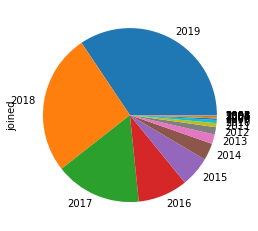

In [20]:
df_cleaned['joined'].value_counts().plot(kind='pie')

Now that joined is looking much better, move on to the other object columns left. The pie graph of player_positions also looks like it has too many unique values, and the values look compounded, so let's see if we can simplify it somehow.

In [21]:
# pd.options.display.max_rows = None
df_cleaned["player_positions"].value_counts(ascending=True)

LW, RM, CM        1
RM, ST, RB        1
LM, LB, ST        1
LM, CM, LWB       1
RM, LM, LWB       1
               ... 
CM, CDM         632
CDM, CM         688
CM              723
ST             1638
CB             2173
Name: player_positions, Length: 629, dtype: int64

Since most quite a lot of data points with 2 or more positions has only 1 count, we are extracting the first position listed as the playe's position.

<AxesSubplot:ylabel='player_positions'>

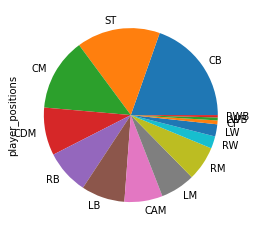

In [22]:
df_cleaned['player_positions'] = df_cleaned['player_positions'].map(lambda x: x+',')
df_cleaned['player_positions'] = df_cleaned['player_positions'].map(lambda x: x[:x.find(',')])
df_cleaned['player_positions'].value_counts().plot(kind='pie')

In [23]:
df_cleaned["player_positions"].value_counts()

CB     2957
ST     2340
CM     2033
CDM    1341
RB     1239
LB     1219
CAM    1070
LM      970
RM      968
RW      343
LW      341
CF      108
LWB      82
RWB      66
Name: player_positions, dtype: int64

Judging by the column name, the column "real face" is not semantically significant to the questioin asked. However, it has very statistically identifying value, so we're keeping it in df_cleaned, just in case it indicates something in the logistics of the game. To get significant result, it'e been excluded from df_num and df_sem (see below).

### 5/27 update (ran)
Since df_cleaned has too many variables for mog, im presenting df_num and df_sem as alternatives. <br>
<b>df_num</b>: all numeric or numeric parsable vairables; df_numeric + 'pace', 'shooting', 'sofifa_df'... <br>
<b>df_sem</b>: all semantically reasonable variables; df_num + a few other boolean type variables - 'mob'...

In [24]:
df_num = df_cleaned.drop(df_cleaned.select_dtypes('object').columns, axis=1)

In [25]:
ct_num = ColumnTransformer([('ss_num', StandardScaler(), ['age', 'mob', 'height_cm', 'weight_kg', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'release_clause_eur',
       'team_jersey_number', 'joined', 'contract_valid_until', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'])],remainder='passthrough')
hs_num=ct_num.fit_transform(df_num)
df_num=pd.DataFrame(hs_num)
df_num.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,1.488287,0.038952,-1.624381,-0.366004,3.997665,3.671987,16.060986,24.803564,10.087341,1.570127,2.334327,2.403035,2.774479,1.119841,3.034880,2.812332,2.931162,2.746810,3.175061,2.914115,3.277983,1.983637,1.410614,2.164884,3.706945,2.340745,1.984693,0.176228,0.693672,0.170584,2.717386,-0.809683,-0.548008,2.676350,2.992232,1.852807,3.461911,-1.034394,-0.793476,-1.253234,-1.441863,0.164126,1.455036,1.153511,-0.811171,17.131261,-0.616596,-6.489031,-0.161665,1.711303,2.836346,3.328464,3.254605,-0.774878,0.109860,3.382986,3.382986,3.382986,3.424631,3.463264,3.463264,3.463264,3.424631,3.467379,3.467379,3.467379,3.472241,3.236363,3.236363,3.236363,3.472241,1.162213,0.901468,0.901468,0.901468,1.162213,0.650624,-0.303468,-0.303468,-0.303468,0.650624,158023.0
1,1.927117,-1.119975,1.009720,1.273092,3.852945,3.507999,9.662014,17.652078,10.087341,1.570127,3.926126,2.119116,2.713232,2.751436,2.103267,2.744444,2.284331,1.954784,1.977820,1.695078,2.877940,1.814437,2.014509,1.675862,3.819722,0.368634,2.660036,2.494489,1.565257,0.964450,2.654143,0.239728,-1.133474,2.744769,2.058891,2.655106,3.364604,-1.321974,-1.057147,-1.358722,-1.116726,0.164126,1.455036,1.153511,0.165564,8.218980,-0.803215,0.322509,0.616319,1.976094,2.907564,2.371958,2.575706,-1.019150,1.333539,3.707984,3.707984,3.707984,3.122274,3.261274,3.261274,3.261274,3.122274,3.059523,3.059523,3.059523,3.149576,2.673806,2.673806,2.673806,3.149576,0.941850,0.509239,0.509239,0.509239,0.941850,0.546671,-0.133915,-0.133915,-0.133915,0.546671,20801.0
2,0.391212,-1.119975,-0.849645,-0.962038,3.708225,3.344010,17.790438,12.511948,10.087341,3.139317,3.926126,2.332055,2.284505,0.432853,2.517318,2.744444,2.850308,2.416799,2.709467,2.020155,3.177972,2.237437,1.841968,2.409396,3.368614,1.436861,1.534465,-0.424803,1.216623,-1.337762,2.084953,-0.599801,-0.760905,2.197415,2.681118,3.056256,3.267296,-1.379490,-1.373552,-1.095002,-0.466453,-0.489302,1.455036,1.480676,0.165564,17.077411,-0.616596,-0.164030,0.616319,2.064357,2.337816,2.850211,3.157619,-1.202353,-0.705927,2.949656,2.949656,2.949656,3.223060,3.160278,3.160278,3.160278,3.223060,3.263451,3.263451,3.263451,3.257131,2.786317,2.786317,2.786317,3.257131,1.052031,0.509239,0.509239,0.509239,1.052031,0.546671,-0.727350,-0.727350,-0.727350,0.546671,190871.0
3,0.610627,-1.409707,-0.849645,-0.067986,3.563505,3.180022,15.109787,20.557369,7.495938,1.570127,2.334327,1.906177,2.100764,0.346980,2.724343,2.472890,2.769454,2.086788,2.177360,2.182693,3.077962,2.237437,1.755697,2.327892,3.143060,2.258574,1.684541,-0.854111,1.478099,-0.226350,1.831980,-0.389918,-0.494784,2.197415,2.603340,2.895796,2.975374,-0.976878,-1.320818,-1.464210,0.183821,0.490840,-1.445310,-0.809484,-0.811171,16.117074,-0.803215,0.809047,2.172288,2.064357,2.195379,2.754561,3.060634,-1.019150,0.109860,2.841323,2.841323,2.841323,3.122274,3.059283,3.059283,3.059283,3.122274,3.161487,3.161487,3.161487,3.257131,2.898829,2.898829,2.898829,3.257131,1.052031,0.705353,0.705353,0.705353,1.052031,0.546671,-0.473021,-0.473021,-0.473021,0.546671,183277.0
4,0.610627,0.038952,0.080038,-0.664021,3.563505,3.180022,15.109787,16.087691,7.495938,3.139317,2.334327,2.757933,1.978271,-0.168261,3.034880,2.405002,2.041769,2.218793,2.443414,2.832846,2.777930,0.799236,0.720447,0.942328,3.255837,0.779491,2.359884,-0.253080,1.913891,0.646903,2.464413,1.149218,0.569701,2.265834,2.992232,2.173727,2.975374,0.978664,0.313943,0.065366,1.484367,0.817554,-1.767571,-0.155153,0.816721,14.501555,-0.181152,-1.137107,1.394304,0.740403,2.409035,3.328464,2.284749,0.568615,1.333539,2.732990,2.732990,2.732990,2.920702,2.958287,2.958287,2.958287,2.920702,3.059523,3.059523,3.059523,3.149576,3.348874,3.348874,3.348874,3.149576,2.264025,2.078156,2.078156,2.078156,2.264025,1.794112,0.968179,0.968179,0.96

In [26]:
df_num_np=df_num.copy()

In [27]:
df_sem = df_cleaned.drop(['nationality','real_face','team_position','joined','mob'],axis=1)

In [28]:
ct_sem = ColumnTransformer([('1hot_sem', OneHotEncoder(dtype='int',sparse=False),['player_positions', 'preferred_foot', 'work_rate', 'body_type']),
                           ('ss_sem', StandardScaler(), ['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'release_clause_eur',
       'team_jersey_number', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb',
       'rb'])], remainder='passthrough')
hs_sem=ct_sem.fit_transform(df_sem)
df_sem=pd.DataFrame(hs_sem)
df_sem.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.488287,-1.624381,-0.366004,3.997665,3.671987,16.060986,24.803564,10.087341,1.570127,2.334327,2.403035,2.774479,1.119841,3.034880,2.812332,2.931162,2.746810,3.175061,2.914115,3.277983,1.983637,1.410614,2.164884,3.706945,2.340745,1.984693,0.176228,0.693672,0.170584,2.717386,-0.809683,-0.548008,2.676350,2.992232,1.852807,3.461911,-1.034394,-0.793476,-1.253234,-1.441863,0.164126,1.455036,1.153511,-0.811171,17.131261,-0.616596,-0.161665,1.711303,2.836346,3.328464,3.254605,-0.774878,0.109860,3.382986,3.382986,3.382986,3.424631,3.463264,3.463264,3.463264,3.424631,3.467379,3.467379,3.467379,3.472241,3.236363,3.236363,3.236363,3.472241,1.162213,0.901468,0.901468,0.901468,1.162213,0.650624,-0.303468,-0.303468,-0.303468,0.650624,158023.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.927117,1.009720,1.273092,3.852945,3.507999,9.662014,17.652078,10.087341,1.570127,3.926126,2.119116,2.713232,2.751436,2.103267,2.744444,2.284331,1.954784,1.977820,1.695078,2.877940,1.814437,2.014509,1.675862,3.819722,0.368634,2.660036,2.494489,1.565257,0.964450,2.654143,0.239728,-1.133474,2.744769,2.058891,2.655106,3.364604,-1.321974,-1.057147,-1.358722,-1.116726,0.164126,1.455036,1.153511,0.165564,8.218980,-0.803215,0.616319,1.976094,2.907564,2.371958,2.575706,-1.019150,1.333539,3.707984,3.707984,3.707984,3.122274,3.261274,3.261274,3.261274,3.122274,3.059523,3.059523,3.059523,3.149576,2.673806,2.673806,2.673806,3.149576,0.941850,0.509239,0.509239,0.509239,0.941850,0.546671,-0.133915,-0.133915,-0.133915,0.546671,20801.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.391212,-0.849645,-0.962038,3.708225,3.344010,17.790438,12.511948,10.087341,3.139317,3.926126,2.332055,2.284505,0.432853,2.517318,2.744444,2.850308,2.416799,2.709467,2.020155,3.177972,2.237437,1.841968,2.409396,3.368614,1.436861,1.534465,-0.424803,1.216623,-1.337762,2.084953,-0.599801,-0.760905,2.197415,2.681118,3.056256,3.267296,-1.379490,-1.373552,-1.095002,-0.466453,-0.489302,1.455036,1.480676,0.165564,17.077411,-0.616596,0.616319,2.064357,2.337816,2.850211,3.157619,-1.202353,-0.705927,2.949656,2.949656,2.949656,3.223060,3.160278,3.160278,3.160278,3.223060,3.263451,3.263451,3.263451,3.257131,2.786317,2.786317,2.786317,3.257131,1.052031,0.509239,0.509239,0.509239,1.052031,0.546671,-0.727350,-0.727350,-0.727350,0.546671,190871.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.610627,-0.849645,-0.067986,3.563505,3.180022,15.109787,20.557369,7.495938,1.570127,2.334327,1.906177,2.100764,0.346980,2.724343,2.472890,2.769454,2.086788,2.177360,2.182693,3.077962,2.237437,1.755697,2.327892,3.143060,2.258574,1.684541,-0.854111,1.478099,-0.226350,1.831980,-0.389918,-0.494784,2.197415,2.603340,2.895796,2.975374,-0.976878,-1.320818,-1.464210,0.183821,0.490840,-1.445310,-0.809484,-0.811171,16.117074,-0.803215,2.172288,2.064357,2.195379,2.754561,3.060634,-1.019150,0.109860,2.841323,2.841323,2.841323,3.122274,3.059283,3.059283,3.059283,3.122274,3.161487,3.161487,3.161487,3.257131,2.898829,2.898829,2.898829,3.257131,1.052031,0.705353,0.705353,0.705353,1.052031,0.546671,-0.473021,-0.473021,-0.473021,0.546671,183277.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.610627,0.0

In [29]:
df_sem_np = df_cleaned.drop(['player_positions','nationality','real_face','team_position','joined','mob'],axis=1)
ct_sem_np = ColumnTransformer([('1hot_sem_np', OneHotEncoder(dtype='int',sparse=False),['preferred_foot', 'work_rate', 'body_type']),
                           ('ss_sem_np', StandardScaler(), ['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'release_clause_eur',
       'team_jersey_number', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb',
       'rb'])], remainder='passthrough')
hs_sem_np=ct_sem_np.fit_transform(df_sem_np)
df_sem_np=pd.DataFrame(hs_sem_np)
df_sem_np.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.488287,-1.624381,-0.366004,3.997665,3.671987,16.060986,24.803564,10.087341,1.570127,2.334327,2.403035,2.774479,1.119841,3.034880,2.812332,2.931162,2.746810,3.175061,2.914115,3.277983,1.983637,1.410614,2.164884,3.706945,2.340745,1.984693,0.176228,0.693672,0.170584,2.717386,-0.809683,-0.548008,2.676350,2.992232,1.852807,3.461911,-1.034394,-0.793476,-1.253234,-1.441863,0.164126,1.455036,1.153511,-0.811171,17.131261,-0.616596,-0.161665,1.711303,2.836346,3.328464,3.254605,-0.774878,0.109860,3.382986,3.382986,3.382986,3.424631,3.463264,3.463264,3.463264,3.424631,3.467379,3.467379,3.467379,3.472241,3.236363,3.236363,3.236363,3.472241,1.162213,0.901468,0.901468,0.901468,1.162213,0.650624,-0.303468,-0.303468,-0.303468,0.650624,158023.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.927117,1.009720,1.273092,3.852945,3.507999,9.662014,17.652078,10.087341,1.570127,3.926126,2.119116,2.713232,2.751436,2.103267,2.744444,2.284331,1.954784,1.977820,1.695078,2.877940,1.814437,2.014509,1.675862,3.819722,0.368634,2.660036,2.494489,1.565257,0.964450,2.654143,0.239728,-1.133474,2.744769,2.058891,2.655106,3.364604,-1.321974,-1.057147,-1.358722,-1.116726,0.164126,1.455036,1.153511,0.165564,8.218980,-0.803215,0.616319,1.976094,2.907564,2.371958,2.575706,-1.019150,1.333539,3.707984,3.707984,3.707984,3.122274,3.261274,3.261274,3.261274,3.122274,3.059523,3.059523,3.059523,3.149576,2.673806,2.673806,2.673806,3.149576,0.941850,0.509239,0.509239,0.509239,0.941850,0.546671,-0.133915,-0.133915,-0.133915,0.546671,20801.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.391212,-0.849645,-0.962038,3.708225,3.344010,17.790438,12.511948,10.087341,3.139317,3.926126,2.332055,2.284505,0.432853,2.517318,2.744444,2.850308,2.416799,2.709467,2.020155,3.177972,2.237437,1.841968,2.409396,3.368614,1.436861,1.534465,-0.424803,1.216623,-1.337762,2.084953,-0.599801,-0.760905,2.197415,2.681118,3.056256,3.267296,-1.379490,-1.373552,-1.095002,-0.466453,-0.489302,1.455036,1.480676,0.165564,17.077411,-0.616596,0.616319,2.064357,2.337816,2.850211,3.157619,-1.202353,-0.705927,2.949656,2.949656,2.949656,3.223060,3.160278,3.160278,3.160278,3.223060,3.263451,3.263451,3.263451,3.257131,2.786317,2.786317,2.786317,3.257131,1.052031,0.509239,0.509239,0.509239,1.052031,0.546671,-0.727350,-0.727350,-0.727350,0.546671,190871.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.610627,-0.849645,-0.067986,3.563505,3.180022,15.109787,20.557369,7.495938,1.570127,2.334327,1.906177,2.100764,0.346980,2.724343,2.472890,2.769454,2.086788,2.177360,2.182693,3.077962,2.237437,1.755697,2.327892,3.143060,2.258574,1.684541,-0.854111,1.478099,-0.226350,1.831980,-0.389918,-0.494784,2.197415,2.603340,2.895796,2.975374,-0.976878,-1.320818,-1.464210,0.183821,0.490840,-1.445310,-0.809484,-0.811171,16.117074,-0.803215,2.172288,2.064357,2.195379,2.754561,3.060634,-1.019150,0.109860,2.841323,2.841323,2.841323,3.122274,3.059283,3.059283,3.059283,3.122274,3.161487,3.161487,3.161487,3.257131,2.898829,2.898829,2.898829,3.257131,1.052031,0.705353,0.705353,0.705353,1.052031,0.546671,-0.473021,-0.473021,-0.473021,0.546671,183277.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.610627,0.080038,-0.664021,3.563505,3.180022,15.109787,16.087691,7.495938,3.139317,2.334327,2.757933,1.978271,-0.168261,3.034880,2.405002,2.041769,2.218793,2.443414,2.832846,2.777930,0.799236,0.720447,0.942328,3.255837,0.779491,2.359884,-0.253080,1.913891,0.646903,2.464413,1.149218,0.569701,2.265834,2.992232,2.173727,2.975374,0.978664,0.313943,0

Now we one hot encode all the non-numeric columns left and scale the entire dataframe.

In [30]:
# var_spa = pd.DataFrame(data={'df_any':df_any.shape, "df_cleaned": df_cleaned.shape, "df_num":df_num.shape, "df_num_np": df_num_np.shape, "df_sem": df_sem.shape, "df_sem_np":df_sem_np.shape})
var_spa = pd.DataFrame(data={'df_cleaned':df_cleaned.shape,"df_num":df_num.shape, "df_num_np": df_num_np.shape, "df_sem": df_sem.shape, "df_sem_np":df_sem_np.shape})
var_spa

,df_cleaned,df_num,df_num_np,df_sem,df_sem_np
0,15077,15077,15077,15077,15077
1,89,82,82,114,100


<div style="color:green">df_num_np is the same as df_num becase player_positions is not numeric and thus is already dropped in df_num; For consistency sake I'm keeping df_num_np; use which ever you like. </div> <br>
Also I kept df_cleaned to reference back to in PSA, so it's not column transformed and is readabla (so is df_any).

### Variable Dictionary:

df_cleaned: dataframe; cleaned data with no na and some parsed values; all meaningful columns<br>
hs_ct: stack; after column transforming df_cleaned (after one hot encoding and standard scaling)<br>
df_ct: dataframe; column transformed df_cleaned (after one hot encoding and standard scaling);column 305 is the 'sofifa_id' (i'm keeping it cuz the gc said to; feel free to drop it in processing)<br><br>

The "palyer_postions" column in df_cleaned is the position variable.

## K-means

In [31]:
df_sem_np = df_sem_np.div(df_sem_np.max(),axis=1) # normalization

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
sem_np_new = pca.fit_transform(df_sem_np)
pd.DataFrame(sem_np_new)

,0,1,2,3,4,5,6,7
0,6.213193,-1.096939,0.149303,0.196410,0.674513,0.621531,-0.212237,0.160441
1,5.624419,-0.942487,1.457177,-0.049887,-0.991004,0.516661,-0.940521,0.222434
2,5.716319,-1.671059,-0.044081,0.022960,-0.469844,-0.208394,0.252631,-0.578836
3,5.547149,-1.293083,0.272576,-0.619696,-0.295235,-0.340895,0.205706,-0.765977
4,5.708267,1.146242,0.727748,-0.005489,-0.015358,-0.579220,0.042476,-0.454890
...,...,...,...,...,...,...,...,...
15072,-2.920017,-0.869914,-0.023247,-0.033774,0.589688,-1.001016,0.401176,0.236316
15073,-4.869247,-0.528821,-0.202893,-0.768213,-0.234873,-0.230190,1.026577,0.628047
15074,-4.622507,-0.558629,-0.606652,-0.546701,0.271457,-0.836085,0.300880,0.488926
15075,-3.059843,-0.505462,-0.355781,0.913998,-0.288885,0.009120,0.848550,0.052844


In [ ]:
def init_centroids(dataset, k):
    n, dim = dataset.shape
    centroids = np.zeros((k, dim))
    for i in range(k):
        index = int(np.random.uniform(0, n))
        centroids[i, :] = dataset[index, :]
    return centroids

def kmeans(dataset, k):
    n = dataset.shape[0]
    cluster_assment = np.mat(np.zeros((n, 2)))
    cluster_changed = True
    
    # first step
    centroids = init_centroids(dataset, k)
    while cluster_changed:
        cluster_changed = False  
        for i in range(n):
            min_dist = 100000
            min_index = 0
            
            # closest
            for j in range(k):
                distance = np.linalg.norm(dataset[i, :] - centroids[j, :])
                if distance < min_dist:
                    min_dist = distance
                    min_index = j
            
            # assign
            if cluster_assment[i, 0] != min_index:
                cluster_changed = True
                cluster_assment[i, :] = min_index, min_dist**2
                
        # update
        for j in range(k):
            points = dataset[np.nonzero(cluster_assment[:, 0].A == j)[0]]
            centroids[j, :] = np.mean(points, axis=0)
    return cluster_assment[:, 0], centroids

In [33]:
from scipy.spatial.distance import cdist

def select_k(dataset, max_k):
    k_list = range(2, max_k)
    meandistortions = []
    for k in k_list:
        _, centroids = kmeans(dataset, k)
        meandistortions.append(sum(np.min(cdist(dataset, centroids, 'euclidean'), axis=1)) / np.array(dataset).shape[0])
    
    plt.plot(k_list, meandistortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('distortions')
    plt.xticks(k_list)
    plt.title('select k by elbow method')
    plt.show()

In [ ]:
select_k(sem_np_new,10)

In [ ]:
k = 3

In [ ]:
km_sem_np,_ = kmeans(sem_np_new,k) # km_sem_np is clustering label by kmeans

plt.xlabel('the 1st component')
plt.ylabel('the 2nd component')
plt.title('k-means')
plt.scatter(sem_np_new[:, 0], sem_np_new[:, 1], c=np.array(km_sem_np))

## Spectral Clustering

In [31]:
# normalize and reduce dimension with PCA
from sklearn.decomposition import PCA

df_sem_np_norm = df_sem_np.div(df_sem_np.max(), axis = 1)
pca = PCA(n_components = 10)
sem_np_reduced = pca.fit_transform(df_sem_np_norm)

In [32]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import sqrtm
from numpy.linalg import inv
from scipy.sparse.linalg import eigs
from sklearn.cluster import KMeans

def spectral_clustering(dataset, nb_cluster):
    n = dataset.shape[0]
    dist = squareform(pdist(dataset, metric = 'sqeuclidean'))
    scale_sig = np.amax(dist)
    
    # similarity matrix
    tmp = dist / scale_sig
    simi_mat = np.exp(-tmp)
    
    # laplacian matrix
    d = np.diag(np.sum(simi_mat, axis = 1))
    dsr = inv(sqrtm(d))
    l = np.dot(np.dot(dsr, simi_mat), dsr)

    # eigenvectors of lap mat
    vals, vecs = eigs(l, k = nb_cluster, which = 'LM', maxiter = 10000, tol = 1e-3)
    y = np.zeros((n, nb_cluster))

    # normalization
    for i in range(n):
        y[i, :] = vecs[i, :]/np.linalg.norm(vecs[i, :])
    
    sc_label = KMeans(n_clusters = nb_cluster).fit_predict(y)
    return sc_label

<ipython-input-32-7ef7a3063d53>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i, :] = vecs[i, :]/np.linalg.norm(vecs[i, :])


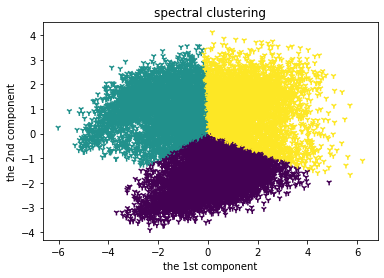

In [33]:
spctclstr_sem_np = spectral_clustering(dataset = sem_np_reduced, nb_cluster = 3)
plt.xlabel('the 1st component')
plt.ylabel('the 2nd component')
plt.title('spectral clustering')
plt.scatter(sem_np_reduced[:, 0], sem_np_reduced[:, 1], c = spctclstr_sem_np, marker = '1')

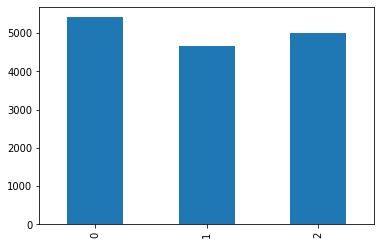

In [34]:
# inspect the number of players assigned to each cluster
pd.Series(spctclstr_sem_np).value_counts().sort_index().plot.bar()
plt.show()

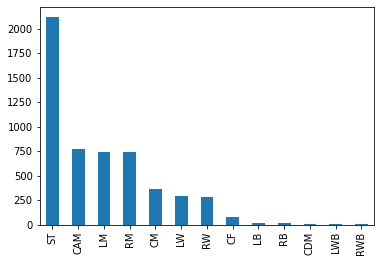

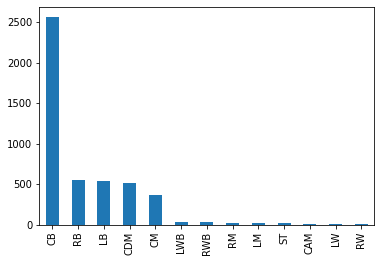

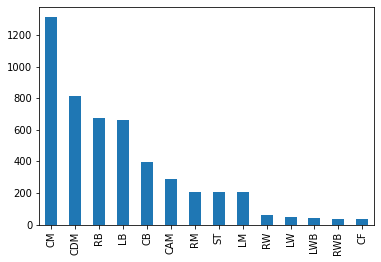

In [35]:
for i in range(3):
    cluster_idx = [idx for idx, element in enumerate(spctclstr_sem_np) if spctclstr_sem_np[idx] == i]
    label = [df_cleaned['player_positions'].iloc[i] for i in cluster_idx]
    pd.Series(label).value_counts().plot.bar()
    plt.show()

## Mixture of Gaussian (MOG)

Reference:
1. https://blog.csdn.net/qq_30091945/article/details/81134598
2. https://blog.csdn.net/DeniuHe/article/details/101566452

### PCA + MOG

In [31]:
# import gc
# del df_any
# del df_any_dropped
# del df_num
# del df_num_np
# del df_sem
# del hs_num
# del hs_sem
# gc.collect()

60

In [34]:
hs_sem_np.shape

(15077, 100)

There are too many dimemsions in the data, thus, using PCA to reduce dimemsion first.

In [138]:
def pca(X,k=0,max_vector=False):
    m = np.mean(X,axis=0)
    xm = X - m
    cov = np.dot(xm.T,xm)
    eig_val, eig_vec = np.linalg.eig(cov)
#     print(eig_val)
#     print(eig_vec)
    sorted_eig_val = np.flipud(np.argsort(eig_val))
    if max_vector == True:
        return eig_vec[sorted_eig_val[0]]
    plt.plot(np.cumsum(eig_val[sorted_eig_val]/np.sum(eig_val)))
    feature = []
    if k == 0:
        return
    if max_vector == True:
        return eig_vec[sorted_eig_val[0]]
    for i in range(k):
        feature.append(eig_vec[:,sorted_eig_val[i]])
#        print(eig_val[sorted_eig_val[i]])
    feature = np.array(feature)
#     print(feature)
 
    data = np.dot(xm,feature.T)
    return data

[ 9.99999898e-01+6.45753944e-059j  3.97788825e-08+2.56873729e-066j
  2.25161132e-08+1.45398704e-066j  6.61806074e-09+4.27363926e-067j
  3.58592018e-09+2.31562233e-067j  3.26347008e-09+2.10739889e-067j
  1.76111320e-09+1.13724591e-067j  1.50207269e-09+9.69969460e-068j
  1.42215597e-09+9.18362918e-068j  1.31750135e-09+8.50781778e-068j
  1.29772527e-09+8.38011294e-068j  1.28948957e-09+8.32693060e-068j
  1.26374327e-09+8.16067286e-068j  1.24478213e-09+8.03823052e-068j
  1.22797258e-09+7.92968215e-068j  1.09714970e-09+7.08488816e-068j
  9.86850453e-10+6.37262637e-068j  8.54294648e-10+5.51664195e-068j
  8.09571356e-10+5.22783949e-068j  7.83630456e-10+5.06032509e-068j
  6.75088961e-10+4.35941404e-068j  6.24917015e-10+4.03542668e-068j
  5.92671479e-10+3.82719984e-068j  5.54452407e-10+3.58039865e-068j
  5.28328213e-10+3.41170062e-068j  4.50568859e-10+2.90956647e-068j
  4.33483958e-10+2.79924004e-068j  4.08930230e-10+2.64068336e-068j
  3.91250929e-10+2.52651856e-068j  3.77998740e-10+2.44094202e-

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-41-c7add1c873f7>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pca_data = pca_data.astype("double")


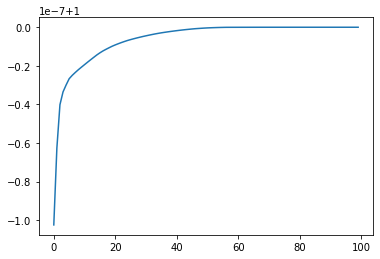

In [41]:
pca_data = pca(hs_sem_np,k=10)
pca_data = pca_data.astype("double")

In [43]:
pca_data.shape

(15077, 10)

Since the first ten eigenvectors cover 95% of variance, we reduce our data to 10 dimensions.

In [44]:
# Standardize pca_data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(pca_data)
pca_data = scaler.transform(pca_data)

In [45]:
from scipy.stats import multivariate_normal

In [46]:
# E-Step
def E_Step(K,X,u,sigma,pi):
    row, col = X.shape
    for i in range(row):
        respons = np.array([pi[k] * multivariate_normal.pdf(X[i], u[k], sigma[k]) for k in range(K)])
        sum_respons = np.sum(respons)
        gamma[i] = respons/sum_respons

In [47]:
# M-Step
def M_Step(K,X,u,sigma,pi):
    row, col = X.shape
    for k in range(K):
        nk = np.sum([gamma[i][k] for i in range(row)])
        pi[k] = nk/row
        u[k] = np.sum([gamma[i][k]*X[i] for i in range(row)],axis=0)*(1.0/nk)
        xdiffs = X - u[k]
        sigma[k] = np.sum([gamma[i][k]*xdiffs[i].reshape((col,1)).dot(xdiffs[i].reshape((1,col))) for i in range(row)],axis=0)*(1.0/nk)

In [48]:
# loglikelihood
def loglikelihood(K,X,u,sigma,pi):
    row, col = X.shape
    num = 0
    for i in range(row):
        temp = np.sum([pi[k]*multivariate_normal.pdf(X[i],u[k],sigma[k]) for k in range(K)])
        temp = np.log(temp)
        num += temp
    return num

In [49]:
logli = 0
oldlogli = 1

In [50]:
### Main Cell

np.random.seed(42)

u = np.random.rand(3,10)
sigma = [np.identity(10)*10 for i in range(14)]
pi = np.random.rand(3)
gamma = [np.zeros(3) for i in range(len(pca_data))]
row, col = pca_data.shape
logl = []

# do 100 iteration
count = 0
while count < 100:
    oldlogli = logli
    E_Step(3,pca_data,u,sigma,pi)
    M_Step(3,pca_data,u,sigma,pi)
    logli = loglikelihood(3,pca_data,u,sigma,pi)
    print(logli)
    logl.append(logli)
    # Normalize Gamma
    for i in range(row):
        gamma[i] = gamma[i]/np.sum(gamma[i])
    count+=1

-213767.51200707795
-209424.01741340992
-203670.14414993874
-200833.63667322812
-199163.21686830543
-198028.95022830274
-197213.95362897895
-196597.07043387616
-196026.0679403142
-195402.3962640461
-194695.99992867632
-193895.9015884505
-192989.56691119593
-192257.81968449027
-191811.2000827598
-191502.1033737842
-191291.21513460507
-191158.97317477682
-191082.78469354098
-191037.77888110947
-191008.49641843472
-190987.4464847064
-190971.16733124552
-190957.9552924113
-190946.90767091396
-190937.53212513958
-190929.55982781848
-190922.82607036072
-190917.19218698738
-190912.51476843475
-190908.64862370206
-190905.45883940358
-190902.8283723277
-190900.65962493524
-190898.87262912886
-190897.40211551424
-190896.19459972437
-190895.2059031064
-190894.39920368715
-190893.74357672557
-190893.21292890696
-190892.78521832897
-190892.44186470564
-190892.16727763883
-190891.9484559242
-190891.7746321329
-190891.63695112168
-190891.5281791827
-190891.44244370383
-190891.3750037373
-190891.32205

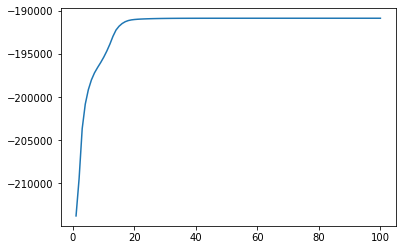

In [51]:
plt.plot(np.linspace(1,100,100),logl)

In [52]:
pd.DataFrame(gamma).to_csv("/Users/waichung/Desktop/SP21/COGS118B/gamma.csv")
pd.DataFrame(u).to_csv("/Users/waichung/Desktop/SP21/COGS118B/u.csv")
pd.DataFrame(pi).to_csv("/Users/waichung/Desktop/SP21/COGS118B/pi.csv")

In [53]:
for i in range(3):
    path = "/Users/waichung/Desktop/SP21/COGS118B/sigma"+str(i)+".csv"
    pd.DataFrame(sigma[i]).to_csv(path)

### Result Analysis

In [32]:
df_gamma = pd.read_csv("/Users/waichung/Desktop/SP21/COGS118B/gamma.csv")

In [33]:
df_gamma = df_gamma.drop(columns='Unnamed: 0')

In [34]:
df_gamma.head()

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [35]:
cluster = [np.argmax(df_gamma.iloc[i]) for i in range(df_gamma.shape[0])]

In [36]:
df_gamma['Cluster'] = cluster
df_gamma.head()

,0,1,2,Cluster
0,0.0,0.0,1.0,2
1,0.0,0.0,1.0,2
2,0.0,0.0,1.0,2
3,0.0,0.0,1.0,2
4,0.0,0.0,1.0,2


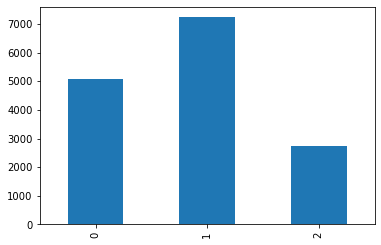

In [40]:
pd.Series(cluster).value_counts().sort_index().plot.bar()
plt.show()

We want to know what is the most frequent position in each cluster, that is, we want to label each cluster

In [41]:
cluster0 = [idx for idx, element in enumerate(cluster) if cluster[idx] == 0]

In [42]:
label0 = [df_cleaned['player_positions'].iloc[i] for i in cluster0]

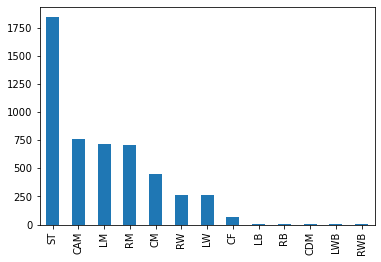

In [43]:
pd.Series(label0).value_counts().plot.bar()
plt.show()

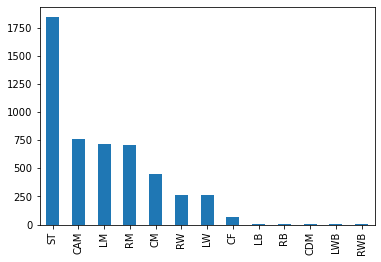

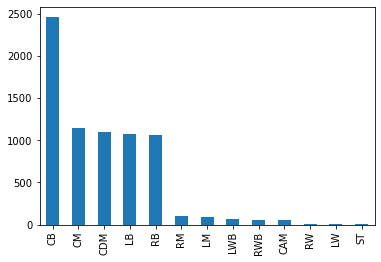

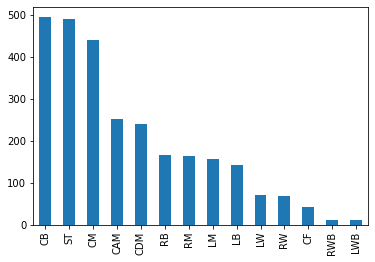

In [44]:
for i in range(3):
    cluster_idx = [idx for idx, element in enumerate(cluster) if cluster[idx] == i]
    label = [df_cleaned['player_positions'].iloc[i] for i in cluster_idx]
    pd.Series(label).value_counts().plot.bar()
    plt.show()

We can notice that the first cluster mainly consists of offensive players, and the second cluster mainly consists of defending players. However, in the third cluster, it's interesting to observe equal amount of CB and ST. This triggers a question, does CB and ST have something in common but also something in special?

### ST & CB

https://machinelearningmastery.com/divergence-between-probability-distributions/

In [151]:
a = ['preferred_foot', 'work_rate', 'body_type','age', 'height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot',
       'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb',
       'rb']

In [152]:
st = df_cleaned[df_cleaned['player_positions']=="ST"]
st = st[a]
cb = df_cleaned[df_cleaned['player_positions']=="CB"]
cb = cb[a]

In [153]:
from math import log

In [154]:
def kl_divergence(p, q):
    return sum(p[i] * log(p[i]/q[i]) for i in range(len(p)))

In [155]:
kl_divergence(st['preferred_foot'].value_counts().values/np.sum(st['preferred_foot'].value_counts().values),cb['preferred_foot'].value_counts().values/np.sum(cb['preferred_foot'].value_counts().values))

0.020119381790073304

In [156]:
stworkrate = np.append(st['work_rate'].value_counts().values,1e-10)
stworkrate = stworkrate/np.sum(stworkrate)
stworkrate

array([4.08547009e-01, 2.46153846e-01, 1.38888889e-01, 1.10683761e-01,
       6.83760684e-02, 2.13675214e-02, 4.70085470e-03, 1.28205128e-03,
       4.27350427e-14])

In [157]:
cbworkrate = cb['work_rate'].value_counts().values
cbworkrate = cbworkrate/np.sum(cbworkrate)
cbworkrate

array([0.52992898, 0.21102469, 0.1061887 , 0.09029422, 0.04294893,
       0.0138654 , 0.00270544, 0.00236726, 0.00067636])

In [158]:
kl_divergence(stworkrate,cbworkrate)

0.03429404477220215

In [159]:
kl_divergence(st['body_type'].value_counts().values[:3]/np.sum(st['body_type'].value_counts().values[:3]),cb['body_type'].value_counts().values/np.sum(cb['body_type'].value_counts().values))

0.014049585262321036

<BarContainer object of 3 artists>

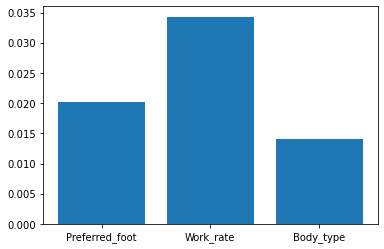

In [160]:
plt.bar(['Preferred_foot','Work_rate','Body_type'],[0.020119381790073304,0.03429404477220215,0.014049585262321036])

In [161]:
cb_num = cb.drop(['preferred_foot','work_rate','body_type'],axis=1)

In [162]:
st_num = st.drop(['preferred_foot','work_rate','body_type'],axis=1)

In [163]:
from scipy.stats import ttest_ind

In [164]:
ttest_res = ttest_ind(cb_num,st_num,equal_var=False,axis=0)
ttest_res.pvalue

array([1.41921249e-005, 1.15822721e-124, 8.36818034e-052, 1.52455382e-001,
       8.45791603e-001, 2.00577306e-083, 0.00000000e+000, 1.37015024e-073,
       0.00000000e+000, 3.03419765e-007, 8.62156369e-006, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 2.04154355e-171, 3.48013077e-079,
       0.00000000e+000, 4.45462278e-293, 1.42930636e-260, 0.00000000e+000,
       6.48891109e-013, 1.04665593e-167, 0.00000000e+000, 1.25781856e-012,
       7.36481780e-001, 5.89508532e-079, 0.00000000e+000, 5.71317278e-230,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       7.19498660e-021, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       4.93999671e-294, 0.00000000e+000, 1.68864402e-078, 0.00000000e+000,
       0.00000000e+000, 1.29823334e-115, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [169]:
idx = np.where(ttest_res.pvalue > 0.0001)
idx = idx[0]
idx

array([ 3,  4, 24])

In [170]:
a_num = a[3:]
for i in range(len(idx)):
    print(a_num[idx[i]])

overall
potential
power_stamina


In [206]:
density1 = np.histogram(st['mentality_composure'], bins=np.linspace(0,100,11))

In [207]:
density1 = density1[0]/np.sum(density1[0])+1e-10

In [208]:
density2 = np.histogram(cb['mentality_composure'], bins=np.linspace(0,100,11))

In [209]:
density2 = density2[0]/np.sum(density2[0])+1e-10

In [210]:
kl_divergence(density1,density2)

0.0643818789088339